In polynomial regression, we find the same 'coefficient' values like linear Regression, but we add polynomial terms to the data.   
Degree value is called 'HyperParameter'.   
Why is it call polynomial linear regression : In summary, it's called "polynomial linear regression" because the model is linear in the coefficients, even though it can fit non-linear relationships through the inclusion of polynomial terms.   

Polynomial Linear Regression is a type of linear regression in which the relationship between the independent variable (predictor) and the dependent variable (response) is modeled as an n-th degree polynomial. It is a useful technique when the data shows a non-linear relationship. Unlike simple linear regression, which fits a straight line to the data, polynomial regression fits a curve to better capture complex relationships in the data.

- In regular linear regression, we try to model the relationship between the dependent variable y and independent variable(s) x by fitting a linear equation of the form : y=β0+β1x+ϵ
- In Polynomial Linear Regression, the relationship is modeled by adding polynomial terms (i.e., powers of x) to the linear regression equation. For example, for a quadratic polynomial (degree 2), the model becomes: y=β0+β1x+β2x2.
- For an n-th degree polynomial, the equation would be: y=β0+β1x+β2x2+β3x3+...+βnxn.   

The degree of the polynomial in polynomial regression is a `hyperparameter` that you set before training the model. It controls the flexibility and complexity of the model. The optimal degree depends on the data and can be selected using domain knowledge, cross-validation, or by evaluating the model's performance through metrics like MSE.

In [511]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [512]:
x = 6 * np.random.randn(200, 1) - 3 
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)  

print(x.shape)
print(y.shape)
# y=0.8x^2+0.9x+2 ::  Generating the dataset using this equation. This equation is polynomial of degree 2 and we added some rendom noise :  np.random.randn(200, 1

(200, 1)
(200, 1)


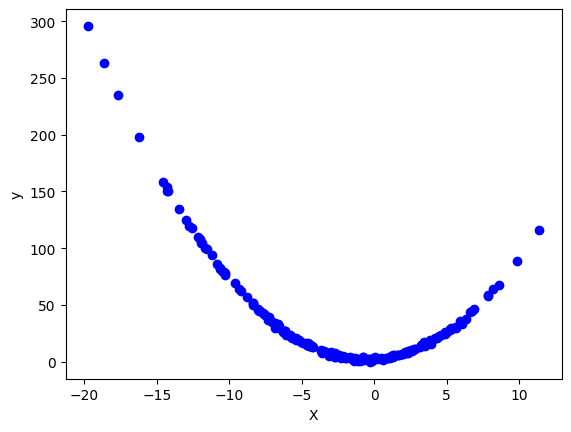

In [513]:
plt.scatter(x, y, color='b') 
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [514]:
# random_state = This ensures that the train-test split remains the same every time you run the code, which is useful for debugging and comparing model performance consistently.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [515]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [516]:
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

-1.5932066552839839

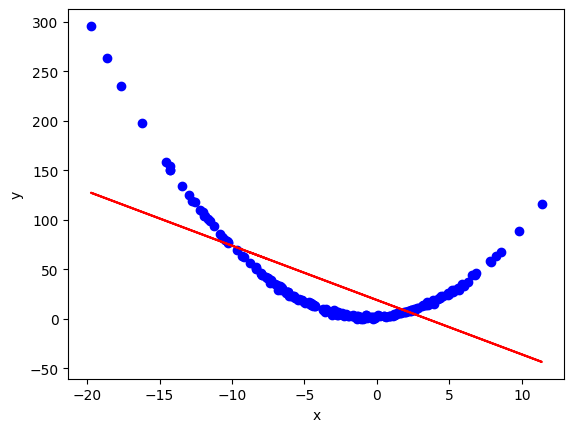

In [517]:
plt.scatter(x, y, color='b', label='Data points')  
plt.plot(x_train, lr.predict(x_train), color='r', label='Prediction') 
plt.xlabel('x')
plt.ylabel('y')

plt.show()

appling ploynomial Linear regression  
degree = 2   
Polynomial features only apply on the input data, we can't apply on y means output features.    
include_bias=False : we don't want 1 as a bias term x^o, then we use the include_bias       

In [518]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [519]:
print(x_train[0])   # This is x_train data 
print(x_train_trans[0])  # Polynomial degree is 2 then it calculate x0(1) ,x1(-8.46082966) ,x2(71.58563851)  :: Where 1,2,3 are powers 

[-8.76207149]
[ 1.         -8.76207149 76.77389678]


In [520]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [521]:
y_pred = lr.predict(x_test_trans)

In [522]:
# r2_score is toword 1 that means Our model is performing better.
r2_score(y_test, y_pred)

0.9969797297384152

This is predicted by my model.    
The values from lr.coef_ and lr.intercept_ are parameters of your regression model, which are used to make predictions for the dependent variable y. When you use these parameters in the regression equation, you can predict y for given values of the independent variables.

In [523]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88970654 0.79948951]]
[2.03462551]


- np.linspace(-3, 3, 200) : Purpose: This function generates evenly spaced numbers over a specified range. np.linspace(-3, 3, 200) creates an array of 200 points between -3 and 3. This is useful for creating input data for predictions, especially in visualizations where you want to see how the model behaves across a range of values.   
Parameters:
-3: The starting value of the range.
3: The ending value of the range.
200: The number of evenly spaced samples to generate.  (x_new.shape)   

- If you are using polynomial regression, poly is typically an instance of PolynomialFeatures from the sklearn.preprocessing module. The transform method creates additional polynomial features (like 𝑥2,𝑥3x3, etc.) based on the original features in x_new. 
- In summary, this code snippet generates a range of input values, transforms them into polynomial features, and then uses a regression model to predict the output values based on those features.   

In [524]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

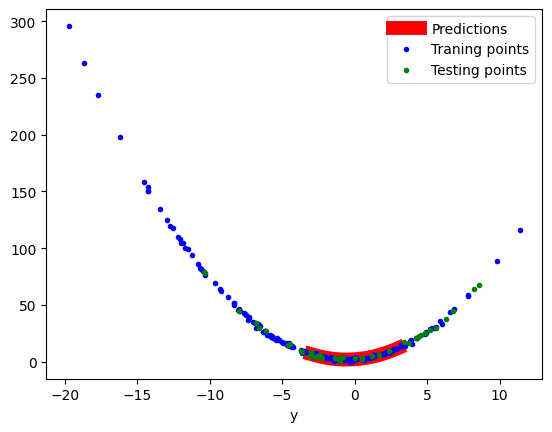

In [525]:
plt.plot(x_new, y_new, "r-", linewidth=10, label="Predictions")
plt.plot(x_train, y_train, "b.", label="Traning points")
plt.plot(x_test, y_test, "g.", label="Testing points")
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.show()

In [526]:
# Polynomial LR 

def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label="Degree " + str(degree), linewidth=2)
    
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.xlabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

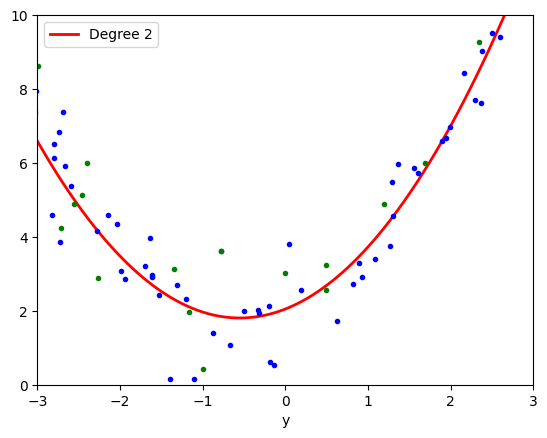

In [527]:
polynomial_regression(2)

- 3D Polynomial regression   
- In this part the code is not imporatnt but understanding is very most important.  

In [528]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

# Calculate z using the polynomial equation
z = x**2 + y**2 + 0.2 * y + 0.1 * x * y + 2 + np.random.randn(100, 1)

In [529]:
import plotly.express as px 
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [530]:
# Multiple LInearRegression without any polynomial feature 
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(x.min(), x.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

In [531]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

In [532]:
x_multi = np.hstack((x, y))  # Shape: (100, 2)
x_multi.shape

(100, 2)

In [533]:
poly = PolynomialFeatures(degree=2)
x_multi_trans = poly.fit_transform(x_multi)

# arrtibutes 
print('Input features:', poly.n_features_in_)
print('Output features:', x_multi_trans.shape[1])
print('Powers\n:', poly.powers_)

Input features: 2
Output features: 6
Powers
: [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [534]:
x_multi_trans.shape

(100, 6)

In [535]:
lr = LinearRegression()
lr.fit(x_multi_trans, z)

LinearRegression()

In [ ]:
x_test_multi = poly.transform(final)
z_final = lr.predict(x_multi_trans).reshape(10, 10)

In [537]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()